In [98]:
import json
from tqdm import tqdm
import pandas as pd
import os

In [14]:
with open('../data/testing/01001.topojson', 'r') as f:
    j = json.load(f)

In [15]:
j.keys()

dict_keys(['type', 'objects', 'arcs', 'bbox'])

In [16]:
j['objects']

{'01001': {'type': 'GeometryCollection',
  'geometries': [{'type': 'Polygon',
    'arcs': [[0, 1, 2, 3, 4, 5, 6]],
    'properties': {'GEOID20': '010010205033012'}},
   {'type': 'Polygon',
    'arcs': [[7, 8, 9, 10]],
    'properties': {'GEOID20': '010010206001009'}},
   {'type': 'Polygon',
    'arcs': [[11, 12, 13, 14, 15]],
    'properties': {'GEOID20': '010010206003005'}},
   {'type': 'Polygon',
    'arcs': [[16, 17, 18, 19, 20, 21, 22]],
    'properties': {'GEOID20': '010010207002006'}},
   {'type': 'Polygon',
    'arcs': [[23, 24, 25, 26]],
    'properties': {'GEOID20': '010010207002008'}},
   {'type': 'Polygon',
    'arcs': [[27, 28, 29, 30, 31]],
    'properties': {'GEOID20': '010010208012016'}},
   {'type': 'Polygon',
    'arcs': [[32, 33, 34]],
    'properties': {'GEOID20': '010010206003013'}},
   {'type': 'Polygon',
    'arcs': [[35, 36, 37, 38, 39, 40]],
    'properties': {'GEOID20': '010010206002006'}},
   {'type': 'Polygon',
    'arcs': [[41, 42, 43, 44, 45, 46, 47]],
    

# Do arc indices ever overlap?

In [17]:
s = set()
pbar = tqdm(j['objects']['01001']['geometries'])
for obj in pbar:
    prev_len = len(s)
    s |= set(obj['arcs'][0])
    pbar.set_description('%s --> %s' % (prev_len, len(s)))
    assert len(s) > prev_len

7542 --> 7553: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1512/1512 [00:02<00:00, 732.40it/s]


# Take a county level topojson, versus a block group level topojson, and compare

In [18]:
import geopandas as gpd

In [22]:
df = gpd.read_file('../data/testing/01001.topojson')
df

,id,GEOID20,geometry
0,NaN,010010205033012,"POLYGON ((-86.43147 32.47125, -86.43120 32.471..."
1,NaN,010010206001009,"POLYGON ((-86.49678 32.43825, -86.49557 32.439..."
2,NaN,010010206003005,"POLYGON ((-86.48140 32.45598, -86.48071 32.455..."
3,NaN,010010207002006,"POLYGON ((-86.46499 32.45638, -86.46486 32.457..."
4,NaN,010010207002008,"POLYGON ((-86.46751 32.45783, -86.46737 32.459..."
...,...,...,...
1507,NaN,010010211002026,"POLYGON ((-86.65551 32.42958, -86.65515 32.429..."
1508,NaN,010010208012003,"POLYGON ((-86.50567 32.45949, -86.50529 32.459..."
1509,NaN,010010208013029,"POLYGON ((-86.50797 32.45913, -86.50809 32.459..."
1510,NaN,010010201002016,"POLYGON ((-86.50012 32.48730, -86.49968 32.487..."


In [24]:
import random

In [30]:
df['value'] = df['geometry'].apply(lambda x: random.randint(0,100))
df

/Users/alanwang/Documents/GitHub/shapes/.venv/lib/python3.10/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,id,GEOID20,geometry,value
0,NaN,010010205033012,"POLYGON ((-86.43147 32.47125, -86.43120 32.471...",69
1,NaN,010010206001009,"POLYGON ((-86.49678 32.43825, -86.49557 32.439...",66
2,NaN,010010206003005,"POLYGON ((-86.48140 32.45598, -86.48071 32.455...",16
3,NaN,010010207002006,"POLYGON ((-86.46499 32.45638, -86.46486 32.457...",65
4,NaN,010010207002008,"POLYGON ((-86.46751 32.45783, -86.46737 32.459...",76
...,...,...,...,...
1507,NaN,010010211002026,"POLYGON ((-86.65551 32.42958, -86.65515 32.429...",31
1508,NaN,010010208012003,"POLYGON ((-86.50567 32.45949, -86.50529 32.459...",42
1509,NaN,010010208013029,"POLYGON ((-86.50797 32.45913, -86.50809 32.459...",22
1510,NaN,010010201002016,"POLYGON ((-86.50012 32.48730, -86.49968 32.487...",24


/Users/alanwang/Documents/GitHub/shapes/.venv/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

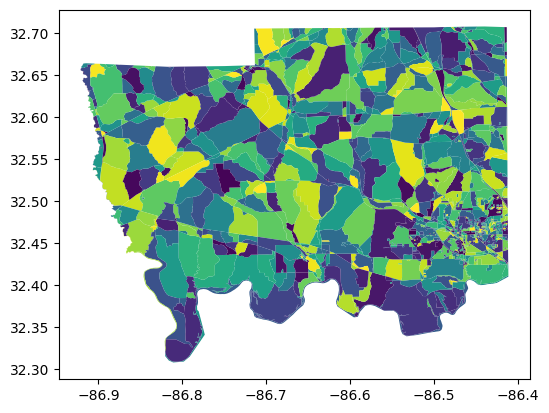

In [31]:
df.plot(column='value')

In [39]:
from shapely.ops import unary_union
cdf = gpd.GeoDataFrame(pd.DataFrame({'geometry': gpd.GeoSeries(unary_union(df['geometry']))}))
cdf

,geometry
0,"POLYGON ((-86.78886 32.31784, -86.78929 32.317..."


<Axes: >

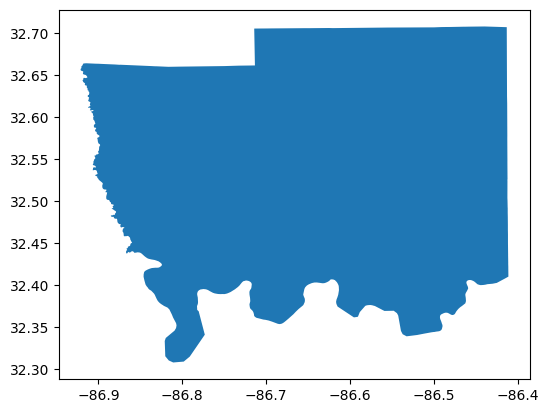

In [40]:
cdf.plot()

In [42]:
cdf.to_file('../data/testing/01001_merged.geojson', index=False)

In [43]:
with open('../data/testing/01001_merged.topojson', 'r') as f:
    j2 = json.load(f)
j2

{'type': 'Topology',
 'objects': {'01001_merged': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon', 'arcs': [[0]]}]}},
 'arcs': [[[-86.78886, 32.317838],
   [-86.78929, 32.317211],
   [-86.789953, 32.316245],
   [-86.790616, 32.315278],
   [-86.791073, 32.314611],
   [-86.791632, 32.314147],
   [-86.792363, 32.31354],
   [-86.793094, 32.312932],
   [-86.7943, 32.311929],
   [-86.795506, 32.310927],
   [-86.798268, 32.308632],
   [-86.801146, 32.308389],
   [-86.802047, 32.308313],
   [-86.802948, 32.308237],
   [-86.803516, 32.308189],
   [-86.804085, 32.308141],
   [-86.806254, 32.307958],
   [-86.808424, 32.307775],
   [-86.809613, 32.307675],
   [-86.810802, 32.307574],
   [-86.811559, 32.307916],
   [-86.812317, 32.308258],
   [-86.8124, 32.308296],
   [-86.812924, 32.308541],
   [-86.813098, 32.308622],
   [-86.813591, 32.308843],
   [-86.813676, 32.308881],
   [-86.816107, 32.30997],
   [-86.818374, 32.312711],
   [-86.818446, 32.312798],
   [-86.818778, 32.313

In [48]:
s = set()
pbar = tqdm(j2['objects']['01001_merged']['geometries'])
for obj in pbar:
    prev_len = len(s)
    s |= set(obj['arcs'][0])
    pbar.set_description('%s --> %s' % (prev_len, len(s)))
    assert len(s) > prev_len

0 --> 1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 524.68it/s]


# How much of the coordinates overlap?

In [57]:
points = set()
for arc in j['arcs']:
    for pt in arc:
        points |= set(pt)
print(len(points))

157352


In [58]:
points2 = set()
for arc in j2['arcs']:
    for pt in arc:
        points2 |= set(pt)
print(len(points2))

4182


In [60]:
len(points.intersection(points2))

4182

# How about, we create a topojson for census tracts (i.e., 11 character-length geoid) and compare the results?

In [63]:
df

,id,GEOID20,geometry,value
0,NaN,010010205033012,"POLYGON ((-86.43147 32.47125, -86.43120 32.471...",69
1,NaN,010010206001009,"POLYGON ((-86.49678 32.43825, -86.49557 32.439...",66
2,NaN,010010206003005,"POLYGON ((-86.48140 32.45598, -86.48071 32.455...",16
3,NaN,010010207002006,"POLYGON ((-86.46499 32.45638, -86.46486 32.457...",65
4,NaN,010010207002008,"POLYGON ((-86.46751 32.45783, -86.46737 32.459...",76
...,...,...,...,...
1507,NaN,010010211002026,"POLYGON ((-86.65551 32.42958, -86.65515 32.429...",31
1508,NaN,010010208012003,"POLYGON ((-86.50567 32.45949, -86.50529 32.459...",42
1509,NaN,010010208013029,"POLYGON ((-86.50797 32.45913, -86.50809 32.459...",22
1510,NaN,010010201002016,"POLYGON ((-86.50012 32.48730, -86.49968 32.487...",24


In [81]:
dfs = []

for ct in tqdm(df['GEOID20'].str[:11].unique()):
    pdf = df[df['GEOID20'].str[:len(ct)] == ct]
    # print(unary_union(pdf['geometry']))
    ctdf = gpd.GeoDataFrame(pd.DataFrame({'geoid': ct, 'geometry': gpd.GeoSeries(unary_union(pdf['geometry']))}))
    dfs.append(ctdf)

mdf = pd.concat(dfs)
mdf

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 22.46it/s]


,geoid,geometry
0,01001020503,"POLYGON ((-86.42474 32.46533, -86.42494 32.465..."
0,01001020600,"POLYGON ((-86.48041 32.43097, -86.48127 32.430..."
0,01001020700,"POLYGON ((-86.45624 32.40846, -86.45603 32.409..."
0,01001020801,"POLYGON ((-86.58941 32.37045, -86.58946 32.371..."
0,01001021100,"POLYGON ((-86.78641 32.32141, -86.78842 32.318..."
0,01001021000,"POLYGON ((-86.75004 32.55464, -86.75115 32.554..."
0,01001020902,"POLYGON ((-86.60311 32.57422, -86.60379 32.574..."
0,01001020803,"POLYGON ((-86.53937 32.48650, -86.54233 32.488..."
0,01001020805,"POLYGON ((-86.44506 32.53309, -86.44542 32.533..."
0,01001020501,"POLYGON ((-86.43141 32.44248, -86.43194 32.442..."


In [87]:
bgdf = df.copy()
bgdf = bgdf.rename(columns={'GEOID20': 'geoid'})
bgdf = bgdf.reindex(['geoid', 'geometry'], axis=1)
bgdf

,geoid,geometry
0,010010205033012,"POLYGON ((-86.43147 32.47125, -86.43120 32.471..."
1,010010206001009,"POLYGON ((-86.49678 32.43825, -86.49557 32.439..."
2,010010206003005,"POLYGON ((-86.48140 32.45598, -86.48071 32.455..."
3,010010207002006,"POLYGON ((-86.46499 32.45638, -86.46486 32.457..."
4,010010207002008,"POLYGON ((-86.46751 32.45783, -86.46737 32.459..."
...,...,...
1507,010010211002026,"POLYGON ((-86.65551 32.42958, -86.65515 32.429..."
1508,010010208012003,"POLYGON ((-86.50567 32.45949, -86.50529 32.459..."
1509,010010208013029,"POLYGON ((-86.50797 32.45913, -86.50809 32.459..."
1510,010010201002016,"POLYGON ((-86.50012 32.48730, -86.49968 32.487..."


In [88]:
mdf = pd.concat([bgdf, mdf])
mdf

,geoid,geometry
0,010010205033012,"POLYGON ((-86.43147 32.47125, -86.43120 32.471..."
1,010010206001009,"POLYGON ((-86.49678 32.43825, -86.49557 32.439..."
2,010010206003005,"POLYGON ((-86.48140 32.45598, -86.48071 32.455..."
3,010010207002006,"POLYGON ((-86.46499 32.45638, -86.46486 32.457..."
4,010010207002008,"POLYGON ((-86.46751 32.45783, -86.46737 32.459..."
...,...,...
0,01001020100,"POLYGON ((-86.49824 32.46485, -86.49831 32.464..."
0,01001020804,"POLYGON ((-86.47394 32.48920, -86.47412 32.489..."
0,01001020502,"POLYGON ((-86.43412 32.46046, -86.43412 32.460..."
0,01001020300,"POLYGON ((-86.46718 32.46088, -86.46710 32.461..."


In [89]:
mdf.to_file('../data/testing/01001_bgct.geojson')

In [90]:
# os.system('geo2topo 01001_bgct.geojson > 01001_bgct.topojson')

# Can I remove other geometries and use the same arcs?

In [91]:
with open('../data/testing/01001_bgct.topojson', 'r') as f:
    j3 = json.load(f)
j3

{'type': 'Topology',
 'objects': {'01001_bgct': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[0, 1, 2, 3, 4, 5, 6]],
     'properties': {'geoid': '010010205033012'}},
    {'type': 'Polygon',
     'arcs': [[7, 8, 9, 10]],
     'properties': {'geoid': '010010206001009'}},
    {'type': 'Polygon',
     'arcs': [[11, 12, 13, 14, 15]],
     'properties': {'geoid': '010010206003005'}},
    {'type': 'Polygon',
     'arcs': [[16, 17, 18, 19, 20, 21, 22]],
     'properties': {'geoid': '010010207002006'}},
    {'type': 'Polygon',
     'arcs': [[23, 24, 25, 26]],
     'properties': {'geoid': '010010207002008'}},
    {'type': 'Polygon',
     'arcs': [[27, 28, 29, 30, 31]],
     'properties': {'geoid': '010010208012016'}},
    {'type': 'Polygon',
     'arcs': [[32, 33, 34]],
     'properties': {'geoid': '010010206003013'}},
    {'type': 'Polygon',
     'arcs': [[35, 36, 37, 38, 39, 40]],
     'properties': {'geoid': '010010206002006'}},
    {'type': 'Polygon',
 

In [93]:
len(j3['objects']['01001_bgct']['geometries'])

1529

## Remove all geoids, except for the largerst one

In [96]:
test_remainder = [v for v in j3['objects']['01001_bgct']['geometries'] if v['properties']['geoid']=='01001020902']
j3['objects']['01001_bgct']['geometries'] = test_remainder
j3

{'type': 'Topology',
 'objects': {'01001_bgct': {'type': 'GeometryCollection',
   'geometries': [{'type': 'Polygon',
     'arcs': [[-2424,
       149,
       -2423,
       151,
       145,
       3280,
       -2511,
       2694,
       2487,
       -626,
       2488,
       -1396,
       3196,
       3197,
       -2344,
       -1301,
       3064,
       3073,
       3506,
       3510,
       3512,
       3515,
       3060,
       2594,
       3769,
       3680,
       3516,
       3385,
       3493,
       -1774,
       -1773,
       -1772,
       -2589,
       -2588,
       -2594,
       -2584,
       -2566,
       1686,
       3293,
       94,
       95,
       -591,
       1677,
       -583,
       -582,
       2774,
       3000,
       -157,
       -2048,
       -2047,
       -3005,
       -825,
       -912,
       -823,
       -822,
       -3082,
       2696,
       2697,
       3198,
       3199]],
     'properties': {'geoid': '01001020902'}}]}},
 'arcs': [[[-86.431465, 32.471255

In [99]:
with open('../data/testing/01001_bgct_mod.topojson', 'w') as f:
    json.dump(j3, f)
os.path.isfile('../data/testing/01001_bgct_mod.topojson')

True

<Axes: >

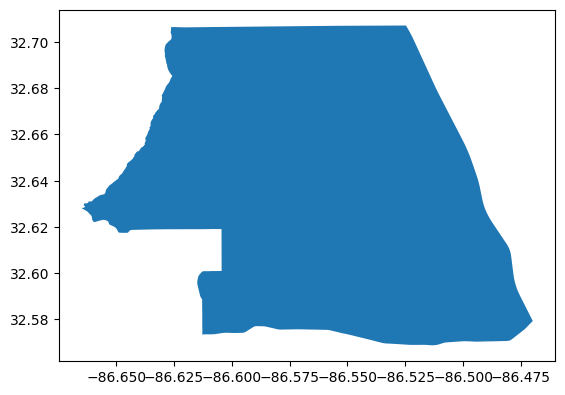

In [100]:
test_df = gpd.read_file('../data/testing/01001_bgct_mod.topojson')
test_df.plot()